<a href="https://colab.research.google.com/github/Cauet-Menezes/Inteligencia_Artificial/blob/main/Algoritmo_genetico_particao_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Nome: Cauet Corrêa de Menezes
## Nome: Gustavo Carvalho Alves dos Santos

Fitness médio da população inicial: 2.76
Fitness médio da população final: 0.0


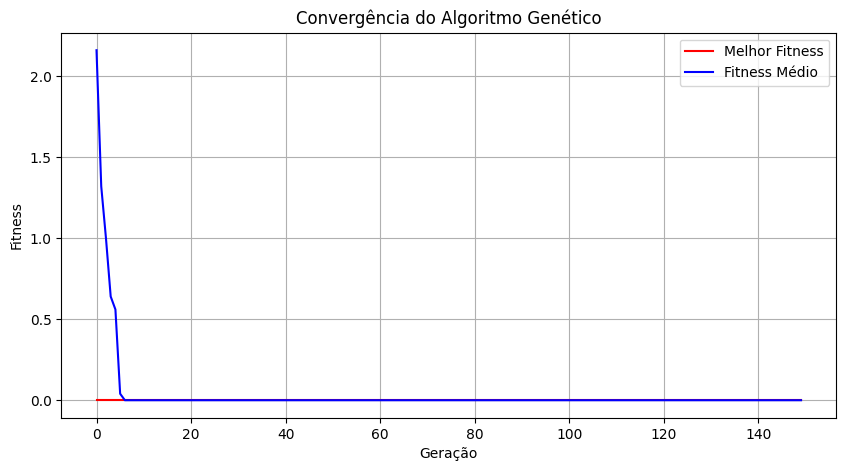

In [69]:
import numpy as np
import matplotlib.pyplot as plt

dimensao = 30
pop_size = 50
vet_int = np.random.randint(0, 2, dimensao)  # Parametro para o fitness
k = 3  # Pressao seletiva
probabilidade_de_mutacao = 0.02  # Probabilidade de mutacao
ponto_de_crossover = int(dimensao/2)  # Ponto de crossover
probabilidade_de_crossover = 0.9  # Probabilidade de crossover
numero_de_geracoes = 150  # Numero de geracoes

def gera_populacao(dimensao, pop_size):
    populacao = np.zeros((pop_size, dimensao), dtype=int)
    for i in range(pop_size):
        populacao[i] = np.random.randint(0, 2, dimensao)
    return populacao

def avalia_fitness(individuo):
    indice_A = np.where(individuo == 1)
    indice_B = np.where(individuo == 0)
    A = vet_int[indice_A]
    B = vet_int[indice_B]
    fitness = np.abs(sum(A) - np.sum(B))
    return fitness

def selecao_torneio(pop, fitness, k):
    indices_selecionado = np.random.randint(0, pop_size, k)
    indice_fit = np.argmin(fitness[indices_selecionado])
    indice_individuo = indices_selecionado[indice_fit]
    return pop[indice_individuo]

def mutacao(individuo, dimensao, probabilidade_de_mutacao):
    numero_aleatorio = np.random.rand(1)
    num_genes = 2
    indice_genes = np.random.randint(0, dimensao, num_genes)
    if num_genes < probabilidade_de_mutacao:
        individuo[indice_genes] = 1 - individuo[indice_genes]
    return individuo

def crossover(individuo1, individuo2):
    probabilidade = np.random.rand(1)
    if probabilidade < ponto_de_crossover:
        filho_1 = np.concatenate((individuo1[0:ponto_de_crossover], individuo2[ponto_de_crossover:]))
        filho_2 = np.concatenate((individuo2[0:ponto_de_crossover], individuo1[ponto_de_crossover:]))
    else:
        filho_1 = individuo1
        filho_2 = individuo2
    return filho_1, filho_2

pop = gera_populacao(dimensao, pop_size)
fitness = np.zeros(pop_size)

# Armazenar o melhor fitness em cada geração
historico_melhor_fitness = []
historico_fitness_medio = []

# Avaliar fitness inicial da população e armazenar a média
for i in range(pop_size):
    fitness[i] = avalia_fitness(pop[i])

# Fitness médio da população inicial
fitness_medio_inicial = np.mean(fitness)
print(f'Fitness médio da população inicial: {fitness_medio_inicial}')

for g in range(numero_de_geracoes):
    novo_pop = np.zeros_like(pop)
    for i in range(int(pop_size/2)):
        selecionado1 = selecao_torneio(pop, fitness, k)
        selecionado2 = selecao_torneio(pop, fitness, k)
        filho1, filho2 = crossover(selecionado1, selecionado2)
        filho1 = mutacao(filho1, dimensao, probabilidade_de_mutacao)
        filho2 = mutacao(filho2, dimensao, probabilidade_de_mutacao)
        novo_pop[2*i] = filho1
        if 2*i+1 < pop_size:
            novo_pop[2*i+1] = filho2
    pop = novo_pop.copy()
    for i in range(pop_size):
        fitness[i] = avalia_fitness(pop[i])

    melhor_fitness = np.min(fitness)
    fitness_medio = np.mean(fitness)
    historico_melhor_fitness.append(melhor_fitness)
    historico_fitness_medio.append(fitness_medio)

# Fitness médio da população final
fitness_medio_final = np.mean(fitness)
print(f'Fitness médio da população final: {fitness_medio_final}')

# Gráfico de convergência
plt.figure(figsize=(10, 5))
plt.plot(historico_melhor_fitness, label='Melhor Fitness', color='RED' )
plt.plot(historico_fitness_medio, label='Fitness Médio', color = 'BLUE')
plt.title('Convergência do Algoritmo Genético')
plt.xlabel('Geração')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.show()
